# Youtube comments spam classification

This dataset is comprise of comments collection from users for videos on youtube of artist i.e Psy, Katy Perry, LMFAO, Eminem, and Shakira.

In these datasets, there is a class column where (0) indicates that it is not a spam and (1) if it is a Spam.

We will use this to build models which classify the comment is either a spam or not.


In [2]:
#pip install emoji

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from collections import Counter
import nltk
import html
import re
import string
import emoji

In [4]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>


False

In [5]:
df1 = pd.read_csv('Youtube01-Psy.csv')
df2 = pd.read_csv('Youtube02-KatyPerry.csv')
df3 = pd.read_csv('Youtube03-LMFAO.csv')
df4 = pd.read_csv('Youtube04-Eminem.csv')
df5 = pd.read_csv('Youtube05-Shakira.csv')

frames = [df1,df2,df3,df4,df5]
df = pd.concat(frames, ignore_index=True)
df.to_csv("not_clean.csv")

In [6]:
print(df.shape)
print(df.columns)
df.head

(1956, 5)
Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS'], dtype='object')


<bound method NDFrame.head of                                        COMMENT_ID                AUTHOR  \
0     LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU             Julius NM   
1     LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A           adam riyati   
2     LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8      Evgeny Murashkin   
3             z13jhp0bxqncu512g22wvzkasxmvvzjaz04       ElNino Melendez   
4             z13fwbwp1oujthgqj04chlngpvzmtt3r3dw                GsMega   
...                                           ...                   ...   
1951  _2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA          Katie Mettam   
1952  _2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI  Sabina Pearson-Smith   
1953  _2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs         jeffrey jules   
1954  _2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0        Aishlin Maciel   
1955  _2viQ_Qnc685RPw1aSa1tfrIuHXRvAQ2rPT9R06KTqA           Latin Bosch   

                            DATE  \
0            2013-11-07T06:20:48 

Text(0.5, 1.0, 'Frequency of Ham(0) & Spam(1)')

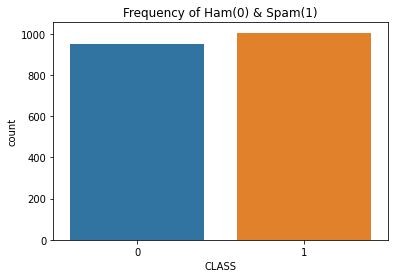

In [7]:
sb.countplot(x='CLASS',data=df).set_title("Frequency of Ham(0) & Spam(1)")

In [8]:
df['comment_len'] = df['CONTENT'].apply(len)
df.head(5)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,comment_len
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,166
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,38
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39


In [9]:
df.groupby('CLASS').describe()

comment_len                                                         
            count        mean         std   min   25%   50%    75%     max
CLASS                                                                     
0           951.0   49.644585   56.284782   2.0  18.0  34.0   62.0   753.0
1          1005.0  137.336318  158.977404  10.0  36.0  65.0  171.0  1200.0

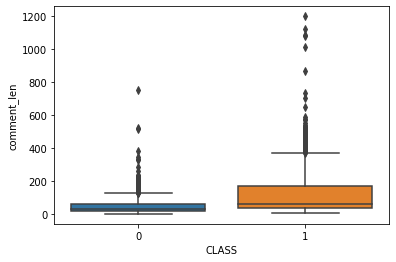

In [10]:
sb.boxplot(x='CLASS', y='comment_len', data=df)

In [11]:
#Trying to insert all available words in a list individually and count the most occuring word in each list.

spam_comments = df[df["CLASS"] == 1]["CONTENT"]
ham_comments = df[df["CLASS"] == 0]["CONTENT"]

spam_words = []
ham_words = []

def spamword (spamWords) :
    global spam_words
    words = [word.lower() for word in spam_comments if word.lower().isalpha()]
    spam_words = spam_words + words
    
def hamword (spamWords) :
    global ham_words
    words = [word.lower() for word in ham_comments if word.lower().isalpha()]
    ham_words = ham_words + words

spamlist = spamword(spam_comments)
hamlist = hamword(spam_comments)

count_ham  = Counter(hamlist)
count_spam = Counter(spamlist)

#Using Counter mos_common method to count most common instance in a dataFrame
df_ham  = pd.DataFrame(count_ham.most_common(20),  columns=['word', 'count'])
df_spam = pd.DataFrame(count_spam.most_common(20), columns=['word', 'count'])



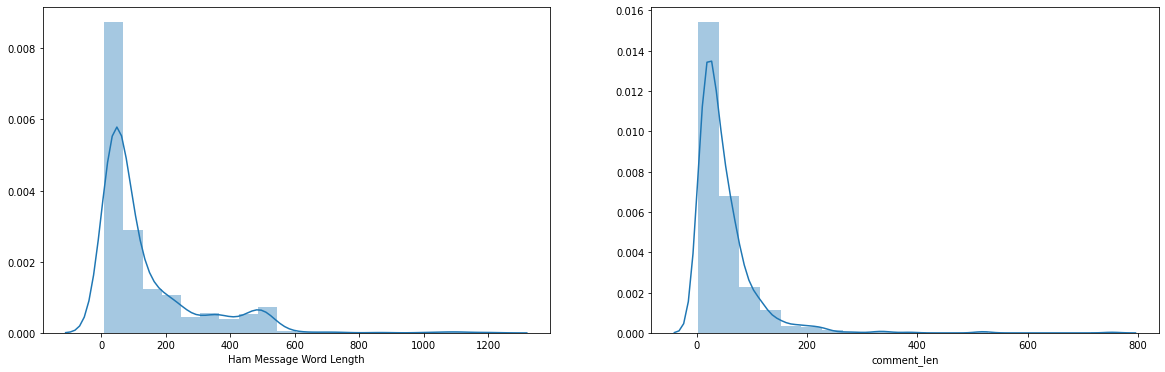

In [12]:
f, ax = plt.subplots(1, 2, figsize = (20, 6))

sb.distplot(df[df["CLASS"] == 1]["comment_len"], bins = 20, ax = ax[0])
ax[0].set_xlabel("Spam Message Word Length")

sb.distplot(df[df["CLASS"] == 0]["comment_len"], bins = 20, ax = ax[1])
ax[0].set_xlabel("Ham Message Word Length")

plt.show()

In [13]:
df = df.drop(['COMMENT_ID', 'AUTHOR', 'DATE', 'comment_len'], axis=1)

In [14]:
print(df.describe)

<bound method NDFrame.describe of                                                 CONTENT  CLASS
0     Huh, anyway check out this you[tube] channel: ...      1
1     Hey guys check out my new channel and our firs...      1
2                just for test I have to say murdev.com      1
3      me shaking my sexy ass on my channel enjoy ^_^ ﻿      1
4               watch?v=vtaRGgvGtWQ   Check this out .﻿      1
...                                                 ...    ...
1951  I love this song because we sing it at Camp al...      0
1952  I love this song for two reasons: 1.it is abou...      0
1953                                                wow      0
1954                            Shakira u are so wiredo      0
1955                         Shakira is the best dancer      0

[1956 rows x 2 columns]>


Lowercase all the words in the df column "CONTENT"

In [15]:
df["CONTENT"] = df["CONTENT"].str.lower()

Replace all the html tags <a... > with the keyword "htmllink"

In [16]:
df['CONTENT']=df['CONTENT'].str.replace("(<a.+>)","htmllink")

Remove all other html tags.

In [17]:
df['CONTENT']=df['CONTENT'].str.replace("(<.+>)","")

Replace all the strings starting with "http" or "https" with the keyword "htmllink"

In [18]:
df['CONTENT']=df['CONTENT'].str.replace(r'(https?://\S+|http?://\S+ )',"htmllink")

Replace all the strings containing ".com"  or "watch\"  with the keyword "htmllink"

In [19]:
df["CONTENT"]=df["CONTENT"].str.replace(r"\S*.com\S*|\S*watch\?\S*","htmllink")

In [20]:
def clean_nonalpha(input_text):
  pattern = re.compile('([^\s\w]|)+')
  return pattern.sub("",input_text)

In [21]:
def translate_emojis(input_text):
  return emoji.demojize(input_text, delimiters=(" ", " "))

In [22]:
def clean_only_numbers(input_text):
  return ' '.join(word for word in input_text.split() if not word.isdigit())

In [23]:
df["CONTENT"]=df["CONTENT"].apply(translate_emojis)

In [24]:
df["CONTENT"]=df["CONTENT"].apply(clean_nonalpha)

In [25]:
df["CONTENT"]=df["CONTENT"].apply(clean_only_numbers)

According to the paper, they achieved better results by not filtering stopwords and lemmatizing. This first approach is not going to perform further filtering.

Bag of words approach.

In [26]:
vocab = []
for sentence in df["CONTENT"]:
  for word in sentence.split():
    vocab.append(word)

In [27]:
# Eliminate duplicate words in the vocabulary
vocabulary = set(vocab)
print(len(vocabulary))

3849


In [28]:
for word in vocabulary:
  df[word] = 0

In [29]:
df.head()

,CONTENT,CLASS,pretty,sinpad,hips,concert,trafficking,moneyquot,password,expectations,...,jenny,df,congrasulation,reed,bewatching,when,5s,sparks,relevant,problem
0,huh anyway check out this youtube channel koby...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hey guys check out my new channel and our firs...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,just for test i have to say htmllink,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,me shaking my sexy ass on my channel enjoy _,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,htmllink check this out,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
for index, sentence in enumerate(df["CONTENT"]):
  for word in sentence.split():
    df[word].iloc[index] += 1  


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
df.head()

,CONTENT,CLASS,pretty,sinpad,hips,concert,trafficking,moneyquot,password,expectations,...,jenny,df,congrasulation,reed,bewatching,when,5s,sparks,relevant,problem
0,huh anyway check out this youtube channel koby...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hey guys check out my new channel and our firs...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,just for test i have to say htmllink,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,me shaking my sexy ass on my channel enjoy _,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,htmllink check this out,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we can create two dictionaries, for spam and not spam comments, containing the words and the total count

In [32]:
df_spam =df[df["CLASS"] == 1]
df_spam.loc['Total']= df_spam.sum(numeric_only=True, axis=0)
df_spam.tail()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,CONTENT,CLASS,pretty,sinpad,hips,concert,trafficking,moneyquot,password,expectations,...,jenny,df,congrasulation,reed,bewatching,when,5s,sparks,relevant,problem
1944,hey music fans i really appreciate all of you ...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1945,check out my new mixtape check out my new mixt...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1946,check out my new mixtape check out my new mixt...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1947,check out my new mixtape check out my new mixt...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total,NaN,1005.0,3.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,...,1.0,0.0,1.0,1.0,0.0,20.0,3.0,1.0,0.0,0.0


In [33]:
print(df_spam.shape)

(1006, 3851)


In [34]:
df_not_spam =df[df["CLASS"] == 0]
df_not_spam.loc['Total']= df_not_spam.sum(numeric_only=True, axis=0)
df_not_spam.tail()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,CONTENT,CLASS,pretty,sinpad,hips,concert,trafficking,moneyquot,password,expectations,...,jenny,df,congrasulation,reed,bewatching,when,5s,sparks,relevant,problem
1952,i love this song for two reasons 1it is about ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1953,wow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1954,shakira u are so wiredo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1955,shakira is the best dancer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total,NaN,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,31.0,0.0,0.0,1.0,1.0


In [35]:
print(df_not_spam.shape)

(952, 3851)


Drop the first two columns of each dictionary.

In [36]:
df_spam.drop("CONTENT",1,inplace=True)
df_spam.drop("CLASS",1,inplace=True)
df_not_spam.drop("CONTENT",1,inplace=True)
df_not_spam.drop("CLASS",1,inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
dict_spam = {word: count for word, count in zip(df_spam.columns,df_spam.loc['Total'])}
dict_not_spam = {word: count for word, count in zip(df_not_spam.columns,df_not_spam.loc['Total'])}

In [38]:
sorted_spam = sorted(dict_spam.items(),key=lambda x: x[1], reverse=True)
sorted_not_spam = sorted(dict_not_spam.items(),key=lambda x: x[1], reverse=True)
print(sorted_spam[:10])
print(sorted_not_spam[:10])

[('out', 569.0), ('check', 545.0), ('htmllink', 514.0), ('my', 512.0), ('and', 485.0), ('to', 480.0), ('you', 463.0), ('i', 457.0), ('the', 413.0), ('a', 389.0)]
[('this', 293.0), ('i', 284.0), ('the', 278.0), ('song', 217.0), ('is', 214.0), ('love', 144.0), ('to', 133.0), ('and', 132.0), ('a', 114.0), ('it', 112.0)]


In [39]:
X = df.iloc[:,2:]
y = df.iloc[:,1]
pd.crosstab(index=y,columns="Count")

col_0,Count
CLASS,
0,951
1,1005


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [41]:
from sklearn.svm import SVC #support vector classifier
clf = SVC(kernel='linear', random_state=0, gamma=0.001).fit(X_train, y_train)
print(clf)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


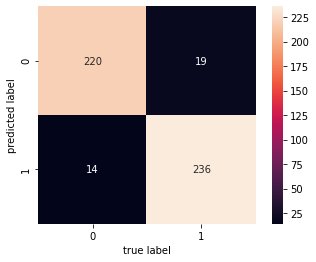

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred = clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       234
           1       0.94      0.93      0.93       255

    accuracy                           0.93       489
   macro avg       0.93      0.93      0.93       489
weighted avg       0.93      0.93      0.93       489



Implementing Naive Bayes model on the train dataset classified with bag2words approach

In [44]:
# import and initialize a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB(alpha=0.75)

In [45]:
#Train model
nb.fit(X_train, y_train)

MultinomialNB(alpha=0.75, class_prior=None, fit_prior=True)

In [46]:
#Predict the outcome of either spam or ham
y_pred_NB = nb.predict(X_test)

In [47]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_NB)

0.9059304703476483

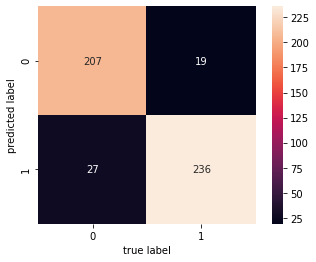

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred = nb.predict(X_test)
mat = confusion_matrix(y_test, y_pred_NB) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_NB, digits=4))

              precision    recall  f1-score   support

           0     0.9159    0.8846    0.9000       234
           1     0.8973    0.9255    0.9112       255

    accuracy                         0.9059       489
   macro avg     0.9066    0.9051    0.9056       489
weighted avg     0.9062    0.9059    0.9058       489



Implementing KNN model on the train dataset classified with bag2words approach

Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

Training and Predictions

In [51]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_scaler, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [52]:
y_pred = classifier.predict(X_test_scaler)

Evaluating the Algorithm

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[220  14]
 [ 73 182]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       234
           1       0.93      0.71      0.81       255

    accuracy                           0.82       489
   macro avg       0.84      0.83      0.82       489
weighted avg       0.84      0.82      0.82       489



Comparing Error Rate with the K Value

In [54]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

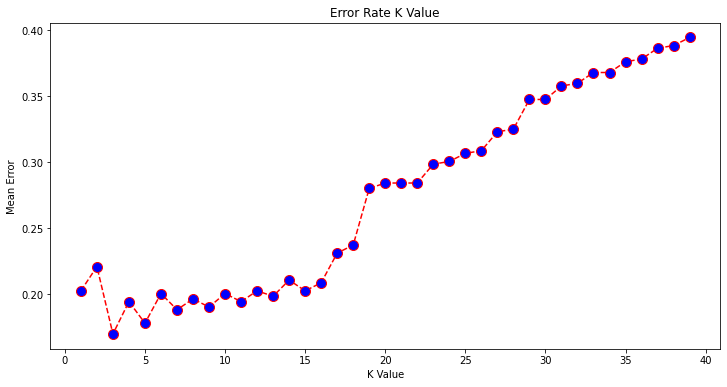

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

 The mean error is low when the value of the K is 5 and 9

Implementing Gaussian model on the train dataset classified with bag2words approach

In [127]:
from sklearn.naive_bayes import GaussianNB
#initialize 
gb = GaussianNB()
print(gb)

#train model
gb.fit(X_train, y_train)

#Predict the outcome of either spam or ham
y_pred_gb = gb.predict(X_test)

# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_gb)

GaussianNB(priors=None, var_smoothing=1e-09)


0.8425357873210634

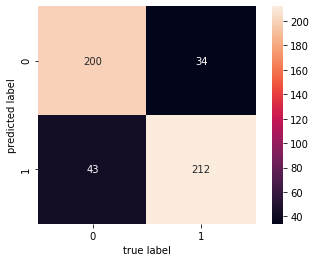

In [128]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred_gb = gb.predict(X_test)
mat = confusion_matrix(y_test, y_pred_gb) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [129]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       243
           1       0.83      0.86      0.85       246

    accuracy                           0.84       489
   macro avg       0.84      0.84      0.84       489
weighted avg       0.84      0.84      0.84       489



Implementing simple svm linear model on the train dataset classified with bag2words approach

In [135]:
sig = SVC(kernel='sigmoid', random_state=0, gamma=0.001).fit(X_train, y_train)
print(sig)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


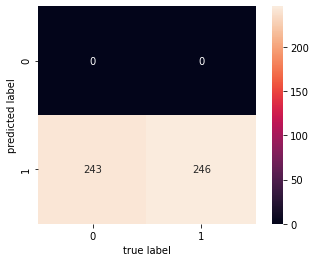

In [136]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred_sig = sig.predict(X_test)
mat = confusion_matrix(y_test, y_pred_sig) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [134]:
print(classification_report(y_test, y_pred_sig))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       243
           1       0.50      1.00      0.67       246

    accuracy                           0.50       489
   macro avg       0.25      0.50      0.33       489
weighted avg       0.25      0.50      0.34       489



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Word2Vec Model**

In [90]:
#pip install --upgrade gensim

In [91]:
import spacy
import multiprocessing
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
import sys

In [92]:
df.to_csv("clean_comments.csv")
!python -m spacy download en

Traceback (most recent call last):
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 163, in _run_module_as_main
    mod_name, _Error)
  File "/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 111, in _get_module_details
    __import__(mod_name)  # Do not catch exceptions initializing package
  File "/Users/toedark/Library/Python/2.7/lib/python/site-packages/spacy/__init__.py", line 12, in <module>
    from . import pipeline
  File "/Users/toedark/Library/Python/2.7/lib/python/site-packages/spacy/pipeline/__init__.py", line 4, in <module>
    from .pipes import Tagger, DependencyParser, EntityRecognizer, EntityLinker
  File "pipes.pyx", line 25, in init spacy.pipeline.pipes
  File "/Users/toedark/Library/Python/2.7/lib/python/site-packages/spacy/pipeline/functions.py", line 4, in <module>
    from ..language import component
  File "/Users/toedark/Library/Python/2.7/lib/python/site-packages/spacy/language

In [93]:
class W2V_embedding:
  def __init__(self, document, lemma, stopwords, min_count, window, nlp):
    self.document = document
    self.nlp = nlp
    self.lemma = lemma
    self.stopwords = stopwords
    self.min_count = min_count
    self.window = window
  def clean_sentence(self, sentence):
    # Lemmatizes and removes stopwords
    if self.lemma and self.stopwords:
      txt = [token.lemma_ for token in sentence if not token.is_stop]
    elif self.lemma:
      txt = [token.lemma_ for token in sentence ]
    elif self.stopwords:
      txt = [token for token in sentence if not token.is_stop]
    return ' '.join(txt)
  def clean_document(self):
    #Clean and drop duplicates from the comments in the dataset.
    txt = [self.clean_sentence(sentence) for sentence in self.nlp.pipe(self.document, batch_size=500, n_threads=-1)]
    df_clean = pd.DataFrame({'clean': txt})
    df_clean = df_clean.dropna().drop_duplicates()
    sentences = [row.split() for row in df_clean['clean']]
    return sentences
  def run(self):
    self.sentences = self.clean_document()
    cores = multiprocessing.cpu_count() 
    w2v_model = Word2Vec(min_count=self.min_count,
                     window=self.window,
                     size=300,
                     workers=cores-1)
    w2v_model.build_vocab(self.sentences, progress_per=100)
    w2v_model.train(self.sentences, total_examples=w2v_model.corpus_count, epochs=50, report_delay=1)
    w2v_model.init_sims(replace=True)
    return w2v_model


In [94]:
nlp = spacy.load('en', disable=['ner','parser'])
init_w2v = W2V_embedding(min_count=1, window=5, lemma=True, stopwords=True, document=df["CONTENT"], nlp=nlp)
w2v_model = init_w2v.run()

In [95]:
w2v_model.wv.most_similar(positive=["like"])

[('second', 0.9785109758377075),
 ('kitten', 0.9677693843841553),
 ('let', 0.9561371803283691),
 ('think', 0.9542164206504822),
 ('you39re', 0.9492302536964417),
 ('loose', 0.9468551874160767),
 ('d', 0.9465453624725342),
 ('miss', 0.9432245492935181),
 ('people', 0.9379925727844238),
 ('life', 0.9372746348381042)]

In [96]:
comments_array = np.zeros(shape=(len(df["CONTENT"]),300))
for index, sentence in enumerate(df["CONTENT"]):
  tokens = nlp(sentence)
  clean_sentence = [token.lemma_ for token in tokens if not token.is_stop]
  #clean_sentence = [str(token) for token in tokens ]
  sentence_vector = []
  for word in clean_sentence: # In the case a word is not found in the vocabulary, we will append a vector of zeros instead
    try: 
      sentence_vector.append(w2v_model[word] ) 
    except:
      sentence_vector.append(np.zeros(300))
      print(word, 'not found')
  comments_array[index] = np.mean(sentence_vector,axis=0)

<ipython-input-96-09fbaba9c113>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  sentence_vector.append(w2v_model[word] )
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [97]:
X = comments_array
isnan = np.argwhere(np.isnan(X))
nan_comments = sorted(set(isnan[:,0])) #index of comments that are NaN values

In [98]:
X[nan_comments,:] = np.zeros(300) # translating NaN comments to an array of zeroes
y = df.iloc[:,1]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
clf = SVC(kernel='linear', random_state=0, gamma=0.001).fit(X_train, y_train)
print(clf)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


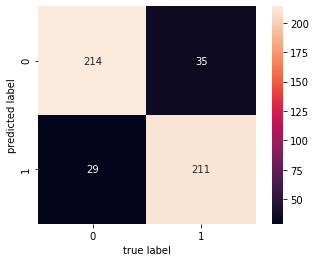

In [100]:
y_pred = clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       243
           1       0.88      0.86      0.87       246

    accuracy                           0.87       489
   macro avg       0.87      0.87      0.87       489
weighted avg       0.87      0.87      0.87       489



Implementing Naive Bayes model on the train dataset classified with Word2vec approach

In [102]:
# import and initialize a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb2 = MultinomialNB(alpha=0.75)

#checking the range of the numpy array 
r = np.ptp(X_train,axis=1)
print(X_train)
print(r)
print("range of numpy array :", max(r), min(r))

[[-0.00552349 -0.05490795  0.03081518 ... -0.03437063  0.01035112
  -0.03987636]
 [ 0.01571629 -0.05018824 -0.00434537 ...  0.02479302  0.01776646
  -0.00017777]
 [ 0.01288456  0.01618504 -0.00827302 ...  0.03752326  0.0339047
   0.01782517]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.01529459 -0.08548871 -0.01925407 ...  0.0582402  -0.01658506
   0.00418361]
 [ 0.00617528 -0.07568762 -0.01619312 ...  0.03880573 -0.01170643
   0.00126778]]
[0.30501968 0.26573177 0.29309899 ... 0.         0.29558285 0.28979574]
range of numpy array : 0.3530300259590149 0.0


In [103]:
from sklearn.preprocessing import MinMaxScaler
#Normalizing the values in the array because naive bayes doesn't work with negative values
scaler = MinMaxScaler()
X_train_minmax = scaler.fit_transform(X_train)

In [104]:
#Train model
nb2.fit(X_train_minmax, y_train)

MultinomialNB(alpha=0.75, class_prior=None, fit_prior=True)

In [105]:
#Predict the outcome of either spam or ham
y_pred_NB2 = nb2.predict(X_test)

In [106]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_NB2)

0.7893660531697342

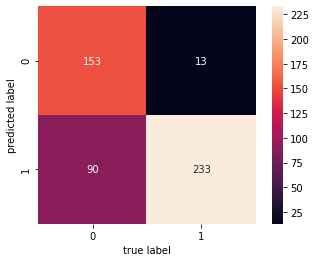

In [107]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred = nb2.predict(X_test)
mat = confusion_matrix(y_test, y_pred_NB2) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_NB2, digits=4))

              precision    recall  f1-score   support

           0     0.9217    0.6296    0.7482       243
           1     0.7214    0.9472    0.8190       246

    accuracy                         0.7894       489
   macro avg     0.8215    0.7884    0.7836       489
weighted avg     0.8209    0.7894    0.7838       489



K-nearest Neighbor

Feature Scaling

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

Training and Predictions

In [120]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train_scaler, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [121]:
y_pred = classifier.predict(X_test_scaler)

In [122]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[219  24]
 [ 34 212]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       243
           1       0.90      0.86      0.88       246

    accuracy                           0.88       489
   macro avg       0.88      0.88      0.88       489
weighted avg       0.88      0.88      0.88       489



Comparing Error Rate with the K Value

In [123]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaler, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

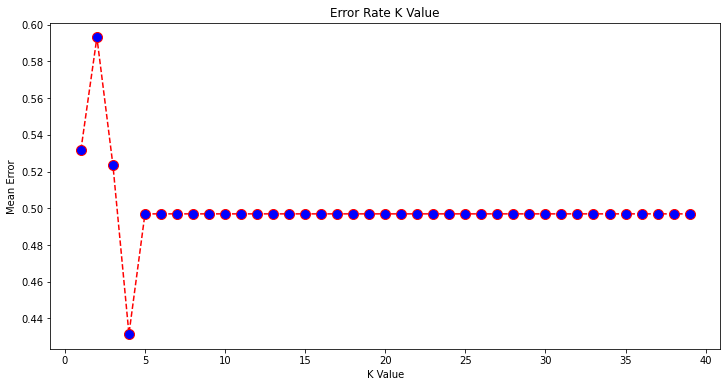

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Best K value is probably between 3 and 5 as can be seen from the error rate k value

Implementing Gaussian model on the train dataset classified with word2vec approach

In [125]:
from sklearn.naive_bayes import GaussianNB
#initialize 
gb = GaussianNB()

#train model
gb.fit(X_train, y_train)

#Predict the outcome of either spam or ham
y_pred_gb = gb.predict(X_test)

# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_gb)

0.8425357873210634

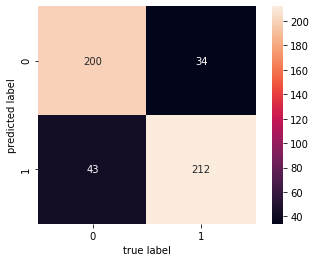

In [138]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred_gb = gb.predict(X_test)
mat = confusion_matrix(y_test, y_pred_gb) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [139]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       243
           1       0.83      0.86      0.85       246

    accuracy                           0.84       489
   macro avg       0.84      0.84      0.84       489
weighted avg       0.84      0.84      0.84       489



Implementing simple svm linear model on the train dataset classified with word2vec approach

In [140]:
sig = SVC(kernel='sigmoid', random_state=0, gamma=0.001).fit(X_train, y_train)
print(sig)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


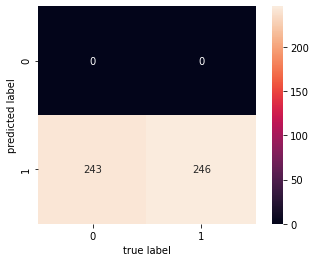

In [141]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred_sig = sig.predict(X_test)
mat = confusion_matrix(y_test, y_pred_sig) #Print the number of good/bad classified points 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [142]:
print(classification_report(y_test, y_pred_sig))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       243
           1       0.50      1.00      0.67       246

    accuracy                           0.50       489
   macro avg       0.25      0.50      0.33       489
weighted avg       0.25      0.50      0.34       489



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
